In [ ]:
#Import libraries
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
from plotly.offline import iplot,init_notebook_mode
init_notebook_mode()
from plotly import tools
import plotly.graph_objs as go 
import warnings
warnings.filterwarnings("ignore")
% matplotlib inline

In [ ]:
# Reading ACORN classification data
df_acorn = pd.read_csv("acorn_details.xls", engine='python')

In [ ]:
df_acorn.head(2)

In [ ]:
# Reading Tariff data
df_tariffs = pd.read_csv("FinalData_SmartMeter/Tariffs.csv")

In [ ]:
df_tariffs.head(2)

In [2]:
# Reading Final.csv created during data preparation
df_final_data = pd.read_csv("final.csv")

In [3]:
df_final_data.head(2)

,LCLid,DateTime,KWh,year,month,day,hour,date,time,Std or ToU tariff,Acorn,Acorn_grouped,quarter
0,MAC002604,2012-07-10 12:00:00,0.263,2012,7,10,12,2012-07-10,12:00 PM,ToU,C,Affluent,2012 Q3
1,MAC002604,2012-07-10 12:30:00,0.070,2012,7,10,12,2012-07-10,12:30 PM,ToU,C,Affluent,2012 Q3


In [32]:
# Reading weather.csv created during data preparation
df_weather = pd.read_csv("weather.csv")

In [33]:
df_weather.head(2)

,month,temperature
0,Jan,4.506828
1,Feb,3.800536


In [11]:
col_pal = ["#0E7C7B", "#E3B505", "#B8336A", "#2E282A", "#7ABB77", "#FF5A5F" ]
sns.set_palette(sns.color_palette(col_pal))

In [12]:
### Income vs Debt
df_income_vs_debt = df_acorn[(df_acorn['REFERENCE']=='Drawing on savings or running into debt')|
                  (df_acorn['REFERENCE']=='£80,000-£100,000')]
## Reshaping data
df_income_vs_debt = df_income_vs_debt.T.iloc[2:,]
df_income_vs_debt.columns = df_income_vs_debt.iloc[0]
df_income_vs_debt = df_income_vs_debt.iloc[1:]
df_income_vs_debt.head()

REFERENCE,"£80,000-£100,000",Drawing on savings or running into debt
A,304,108
B,247,108
C,138,108
D,209,118
E,160,110


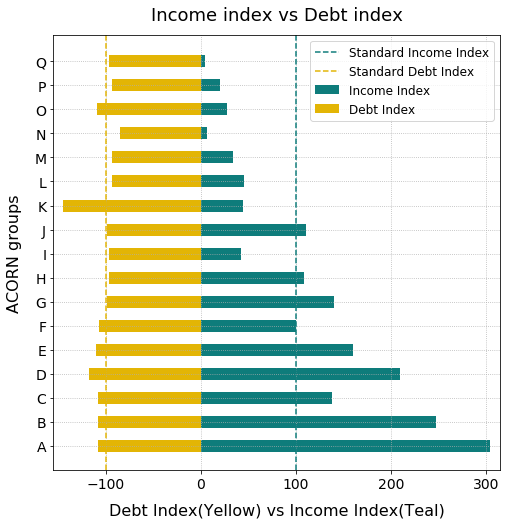

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
ytick_pos = list(range(len(df_income_vs_debt)))
bar_labels = list(map(chr, range(65, 82)))
plt.yticks(ytick_pos, bar_labels, fontsize=14)
plt.xticks(fontsize=14)
plt.barh(ytick_pos, df_income_vs_debt.iloc[:,0], align='center', height=0.5, label='Income Index')
plt.barh(ytick_pos,[-x  for x in df_income_vs_debt.iloc[:,1]], align='center', height=0.5, label='Debt Index')
plt.axvline(x=100, color="#0E7C7B", linestyle='dashed', label='Standard Income Index')
plt.axvline(x=-100, color="#E3B505", linestyle='dashed', label='Standard Debt Index')
plt.xlabel('Debt Index(Yellow) vs Income Index(Teal)', fontsize=16, labelpad=12)
plt.ylabel('ACORN groups', fontsize=16, labelpad=12)
plt.title('Income index vs Debt index', fontsize=18, y=1.02)
plt.ylim([-1, len(bar_labels)+0.1])
plt.xlim([-max(df_income_vs_debt.iloc[:,1])-10, max(df_income_vs_debt.iloc[:,0])+10])
plt.grid(linestyle='dotted')
plt.legend(fontsize='large')
plt.show();

In [14]:
df_occ_k = df_acorn[df_acorn['CATEGORIES']=='Occupation'][['REFERENCE', 'K']]
df_occ_k.columns = ['Occupation', 'Group K']

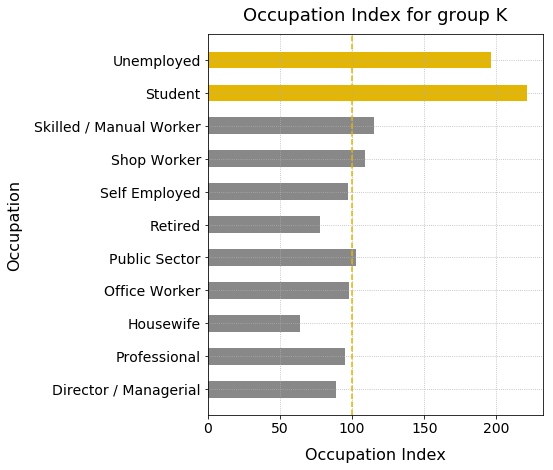

In [15]:
fig, ax = plt.subplots(figsize=(6,7))
ytick_pos = list(range(len(df_occ_k)))
plt.yticks(ytick_pos, df_occ_k['Occupation'], fontsize=14)
plt.xticks(fontsize=14)
plt.barh(ytick_pos, df_occ_k.iloc[:,1], align='center', height=0.5, label='Occupation Index')
plt.axvline(x=100, color="#E3B505", linestyle='dashed', label='Standard Income Index')
for bar in ax.patches:
    bar.set_facecolor('#888888')
pos = df_occ_k.index.get_loc(106)
ax.patches[pos].set_facecolor("#E3B505")
pos1 = df_occ_k.index.get_loc(107)
ax.patches[pos1].set_facecolor("#E3B505")
plt.xlabel('Occupation Index', fontsize=16, labelpad=12, color='black')
plt.ylabel('Occupation', fontsize=16, labelpad=12, color='black')
plt.title('Occupation Index for group K', fontsize=18, y=1.02, color='black')
plt.grid(linestyle='dotted')
plt.show();

In [16]:
## Converting column headers into lowercase
df_acorn.columns = map(str.lower, df_acorn.columns)

In [17]:
df_tech_age = df_acorn[((df_acorn['categories']=='Internet Access: Frequency') & (df_acorn['reference']=='Weekly'))|
            (df_acorn['categories']=='Age')]
df_tech_age.drop(['main categories', 'categories'], axis=1, inplace=True)
df_tech_age = df_tech_age.transpose()
df_tech_age.columns = df_tech_age.iloc[0]
df_tech_age.drop(df_tech_age.index[:1], inplace=True)
df_tech_age.columns = ['0-4', '5-17', '18-24', '25-34', '35-49', '50-64', '65-74', '75+', 'weekly']
df_tech_age = df_tech_age.drop(df_tech_age.index[11:])

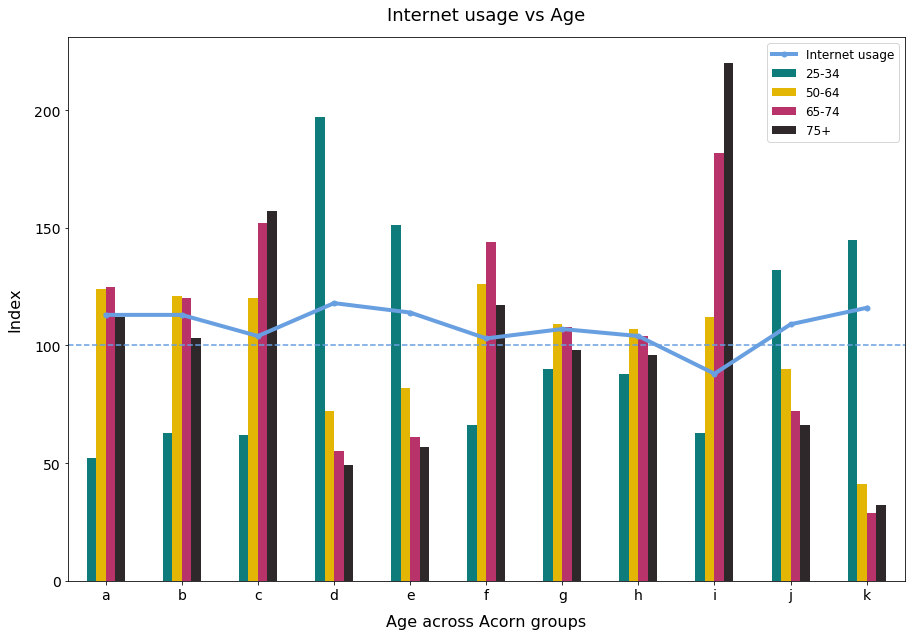

In [18]:
ax = df_tech_age[['25-34', '50-64', '65-74', '75+']].plot(kind='bar', figsize=(15, 10), legend=True)
plt.plot('weekly', data=df_tech_age, marker='.', markerfacecolor="#679FE1", color="#679FE1",
         markersize=10, linewidth=4, label='Internet usage')
plt.xticks(fontsize=14, rotation=360)
plt.yticks(fontsize=14)
plt.axhline(linestyle='dashed', y=100, color='#679FE1')
ax.set_xlabel("Age across Acorn groups", fontsize=16, labelpad=12)
ax.set_ylabel("Index", fontsize=16, labelpad=12)
ax.set_title("Internet usage vs Age", fontsize=18, y=1.02)
plt.legend(loc='upper right', fontsize='large')
plt.show();

In [4]:
df_tariff_std = df_final_data[df_final_data['Std or ToU tariff']=='Std']

In [5]:
df_std_avg_use_per_quarter = df_tariff_std.pivot_table(index='quarter', columns='Acorn_grouped', values='KWh', 
                                             aggfunc='mean')

In [6]:
df_std_avg_use_per_quarter.head(2)

Acorn_grouped,Adversity,Affluent,Comfortable
quarter,,,
2011 Q4,0.247879,0.322542,0.211974
2012 Q1,0.231464,0.303722,0.202278


In [7]:
df_tariff_tou = df_final_data[df_final_data['Std or ToU tariff']=='ToU']

In [8]:
df_tou_avg_use_per_quarter = df_tariff_tou.pivot_table(index='quarter', columns='Acorn_grouped', values='KWh',
                                             aggfunc='mean')

In [9]:
df_tou_avg_use_per_quarter.head(2)

Acorn_grouped,Adversity,Affluent,Comfortable
quarter,,,
2011 Q4,0.194077,0.335652,NaN
2012 Q1,0.234588,0.239867,0.19658


In [6]:
trace1 = go.Scatter(
         x=df_std_avg_use_per_quarter.index,
         y=df_std_avg_use_per_quarter['Affluent'],
         name='Standard tariff',# text displayed as legend label
         legendgroup='a',
         mode='lines+markers',
         marker=dict(
                 size=6,
                 color="yellowgreen",
                 line=dict(width=2)
                 )
                 )
trace2 = go.Scatter(
         x=df_tou_avg_use_per_quarter.index,
         y=df_tou_avg_use_per_quarter['Affluent'],
         name='Dynamic Time of Use Tariff',# text displayed as legend label
         legendgroup='b',
         mode='lines+markers',
         marker=dict(
                 size=6,
                 color="#C5283D",
                 line=dict(width=2)
                 )
                 )

trace3 = go.Scatter(
         x=df_std_avg_use_per_quarter.index,
         y=df_std_avg_use_per_quarter['Adversity'],
         name='Adversity households with std. tariff',# text displayed as legend label
         legendgroup='a',
         showlegend=False,
         mode='lines+markers',
         marker=dict(
                 size=6,
                 color="yellowgreen",
                 line=dict(width=2)
                 )
                 )
trace4 = go.Scatter(
         x=df_tou_avg_use_per_quarter.index,
         y=df_tou_avg_use_per_quarter['Adversity'],
         name='Adversity households with DToU. tariff',# text displayed as legend label
         legendgroup='b',
         showlegend=False,
         mode='lines+markers',
         marker=dict(
                 size=6,
                 color="#C5283D",
                 line=dict(width=2)
                 )
                 )
trace5 = go.Scatter(
         x=df_std_avg_use_per_quarter.index,
         y=df_std_avg_use_per_quarter['Comfortable'],
         name='Comfortable households with std. tariff',# text displayed as legend label
         legendgroup='a',
         showlegend=False,
         mode='lines+markers',
         marker=dict(
                 size=6,
                 color="yellowgreen",
                 line=dict(width=2)
                 )
                 )
trace6 = go.Scatter(
         x=df_tou_avg_use_per_quarter.index,
         y=df_tou_avg_use_per_quarter['Comfortable'],
         name='Comfortable households with DToU tariff',# text displayed as legend label
         legendgroup='b',
         showlegend=False,
         mode='lines+markers',
         marker=dict(
                 size=6,
                 color="#C5283D",
                 line=dict(width=2)
                 )
                 )

fig = tools.make_subplots(rows=3, cols=1, subplot_titles=('Affluent Group', 'Adversity Group', 'Comfortable Group'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 3, 1)
fig.append_trace(trace6, 3, 1)
fig['layout']['xaxis1'].update(title='Yearly Quarters',
                               titlefont=dict(
                                         family='Arial',
                                         size=18,
                                         color='black'),
                               tickfont=dict(
                                         family='Arial',
                                         size=14,
                                         color='black'),
                               gridwidth=2)
fig['layout']['xaxis2'].update(title='Yearly Quarters',
                               titlefont=dict(
                                         family='Arial',
                                         size=18,
                                         color='black'),
                               tickfont=dict(
                                         family='Arial',
                                         size=14,
                                         color='black'),
                               gridwidth=2)
fig['layout']['xaxis3'].update(title='Yearly Quarters',
                               titlefont=dict(
                                         family='Arial',
                                         size=18,
                                         color='black'),
                               tickfont=dict(
                                         family='Arial',
                                         size=14,
                                         color='black'),
                               gridwidth=2)

fig['layout']['yaxis1'].update(title='Avg. Enery Consumption(KWh)',
                               titlefont=dict(
                                         family='Arial',
                                         size=18,
                                         color='black'),
                               tickfont=dict(
                                         family='Arial',
                                         size=14,
                                         color='black'),
                               gridwidth=2)
fig['layout']['yaxis2'].update(title='Avg. Enery Consumption(KWh)',
                               titlefont=dict(
                                         family='Arial',
                                         size=18,
                                         color='black'),
                               tickfont=dict(
                                         family='Arial',
                                         size=14,
                                         color='black'),
                               gridwidth=2)
fig['layout']['yaxis3'].update(title='Avg. Enery Consumption(KWh)',
                               titlefont=dict(
                                         family='Arial',
                                         size=18,
                                         color='black'),
                               tickfont=dict(
                                         family='Arial',
                                         size=14,
                                         color='black'),
                               gridwidth=2)

fig['layout'].update(height=1000, width=1000, title='Average energy consumption by different tariff plans',
                     font=dict(family='Arial', size=20, color='black'))
iplot(fig);

NameError: name 'go' is not defined

In [15]:
df_tariffs['TariffDateTime'] = pd.to_datetime(df_tariffs['TariffDateTime'])

In [16]:
df_final_data_2013 = df_final_data[df_final_data.year==2013]

In [17]:
df_final_data_2013['DateTime'] = pd.to_datetime(df_final_data_2013['DateTime'])

In [18]:
df_final_data_2013_tariffs = df_final_data_2013.merge(df_tariffs, left_on='DateTime', right_on='TariffDateTime', how='left')

In [19]:
df_final_data_2013_tariffs.drop('TariffDateTime', axis=1, inplace=True)

In [20]:
df_final_data_2013_tariffs.head(2)


,LCLid,DateTime,KWh,year,month,day,hour,date,time,Std or ToU tariff,Acorn,Acorn_grouped,quarter,Tariff
0,MAC002604,2013-01-01 00:00:00,0.864,2013,1,1,0,2013-01-01,12:00 AM,ToU,C,Affluent,2013 Q1,Normal
1,MAC002604,2013-01-01 00:30:00,0.803,2013,1,1,0,2013-01-01,12:30 AM,ToU,C,Affluent,2013 Q1,Normal


In [21]:
df_final_data_dtou = df_final_data_2013_tariffs[df_final_data_2013_tariffs['Std or ToU tariff']=='ToU']

In [22]:
df_dtou_halfhourly_energy_usage = df_final_data_dtou.pivot_table(index='time', columns='Tariff', values='KWh', aggfunc='mean').sort_index().reindex(
    index = ['12:00 AM','12:30 AM', '01:00 AM', '01:30 AM', '02:00 AM', '02:30 AM',
       '03:00 AM', '03:30 AM', '04:00 AM', '04:30 AM', '05:00 AM',
       '05:30 AM', '06:00 AM', '06:30 AM', '07:00 AM', '07:30 AM',
       '08:00 AM', '08:30 AM', '09:00 AM', '09:30 AM', '10:00 AM',
       '10:30 AM', '11:00 AM', '11:30 AM', '12:00 PM', '12:30 PM', 
       '01:00 PM', '01:30 PM', '02:00 PM', '02:30 PM', '03:00 PM',
       '03:30 PM', '04:00 PM', '04:30 PM', '05:00 PM', '05:30 PM', 
       '06:00 PM', '06:30 PM', '07:00 PM', '07:30 PM', '08:00 PM', 
       '08:30 PM', '09:00 PM', '09:30 PM', '10:00 PM', '10:30 PM', 
       '11:00 PM', '11:30 PM' ])

In [27]:
data = [
        go.Scatter(
        x=df_dtou_halfhourly_energy_usage.index, # assign x as the dataframe column 
        y=df_dtou_halfhourly_energy_usage['High'], # assign y as the dataframe column
        name='High Tariff',# text displayed as legend label
        mode='lines+markers',
        marker=dict(
                 size=8,
                 color="#E3B505",
                 line=dict(width=2)
                     )
                     ),
        go.Scatter(
        x=df_dtou_halfhourly_energy_usage.index, # assign x as the dataframe column 
        y=df_dtou_halfhourly_energy_usage['Normal'], # assign y as the dataframe column
        name='Normal Tariff',# text displayed as legend label
        mode='lines+markers',
        marker=dict(
                 size=8,
                 color="#C5283D",
                 line=dict(width=2)
                     ),
                     ),
        go.Scatter(
        x=df_dtou_halfhourly_energy_usage.index, # assign x as the dataframe column 
        y=df_dtou_halfhourly_energy_usage['Low'], # assign y as the dataframe column
        name='Low Tariff',# text displayed as legend label
        mode='lines+markers',
        marker=dict(
                 size=8,
                 color="yellowgreen",
                 line=dict(width=2)
                     )
                     )]    
layout = go.Layout(
         autosize=False,
         width=1000,
         height=600,
         title='Half-hourly energy consumption by tariff rates',
         font=dict(family='Arial', size=20, color='black'),
         xaxis=dict(
               title='Time(Hour)',
               titlefont=dict(
                         family='Arial',
                         size=18,
                         color='black'),
         tickfont=dict(
                  family='Arial',
                  size=14,
                  color='black'),
         tickvals=[k*2 for k in range(0,24)],
         ticktext=['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM',
                   '1PM', '2PM', '3PM', '4PM','5PM','6PM','7PM','8PM','9PM','10PM','11PM'],
         tickangle=-45),
         yaxis=dict(
               title='Avg. Energy Consumption per half hour(KWh/hh)',
               titlefont=dict(
               family='Arial',
               size=18,
               color='black'),
               tickfont=dict(
                        family='Arial',
                        size=14,
                        color='black')))
iplot({'data':data,'layout':layout})

In [28]:
#### Energy use by Acorn group for 2013
df_final_data_2013['month'] = df_final_data_2013['month'].apply(lambda x: calendar.month_abbr[x])
df_final_data_2013['KWh'] = df_final_data_2013["KWh"].convert_objects(convert_numeric=True)
df_aeg = df_final_data_2013.groupby(by=['Acorn_grouped', 'month'], sort=False)['KWh'].mean()
df_aeg = df_aeg.unstack(level=0)

In [30]:
trace1 = go.Scatter(
         x=df_aeg.index,
         y=df_aeg.Affluent,                   
         name='Affluent',
         mode='lines+markers',
         marker=dict(
                size=4,
                color="#255F85",
                line=dict(width=2)),
                   ) 
trace2 = go.Scatter(
         x=df_aeg.index,
         y=df_aeg.Adversity,                   
         name='Adversity',
         mode='lines+markers',
         marker=dict(
                size=4,
                color="#E3B505",
                line=dict(width=2)),
                   ) 
trace3 = go.Scatter(
         x=df_aeg.index,
         y=df_aeg.Comfortable,                   
         name='Comfortable',
         mode='lines+markers',
         marker=dict(
                size=4,
                color="#C5283D",
                line=dict(width=2)),
                    ) 
data = [trace1, trace2,trace3]
layout = go.Layout(
         autosize=False,
         width=900,
         height=500,
         title='Mean energy consumption per ACORN group for the year 2013',
         font=dict(family='Arial', size=20, color='black'),
         xaxis=dict(
               title='Month',
               titlefont=dict(
               family='Arial',
               size=18,
               color='black'),
         tickfont=dict(
               family='Arial',
               size=14,
               color='black'),
         gridwidth=2),
        yaxis=dict(
              title='Average Energy consumption(KWh)',
              titlefont=dict(
              family='Arial',
              size=18,
              color='black'),
        tickfont=dict(
              family='Arial',
              size=14,
              color='black'),
        gridwidth=2))
iplot({'data':data,'layout':layout})

In [39]:
trace1 = go.Scatter(
         x=df_aeg.index,
         y=df_aeg.Affluent,                   
         name='Affluent',
         mode='lines+markers',
         marker=dict(
                size=4,
                color="#255F85",
                line=dict(width=2)),
                   ) 
trace2 = go.Scatter(
         x=df_aeg.index,
         y=df_aeg.Adversity,                   
         name='Adversity',
         mode='lines+markers',
         marker=dict(
                size=4,
                color="#E3B505",
                line=dict(width=2)),
                   ) 
trace3 = go.Scatter(
         x=df_aeg.index,
         y=df_aeg.Comfortable,                   
         name='Comfortable',
         mode='lines+markers',
         marker=dict(
                size=4,
                color="#C5283D",
                line=dict(width=2)),
                    )  
trace4 = go.Scatter(
         x=df_weather.month,
         y=df_weather.temperature,
         name='temperature',
         mode='lines+markers',
         line=dict(width=4),
         marker=dict(
                  color="yellowgreen",
                  line=dict(width=2)),
                  xaxis='x1', 
                  yaxis='y2')
data = [trace1, trace2,trace3,trace4]
layout = go.Layout(
         autosize=False,
         width=1000,
         height=500,
         title='Temperature vs mean energy consumption per ACORN group ',
         font=dict(family='Arial', size=20, color='black'),
         xaxis=dict(
         title='Month',
         titlefont=dict(
                   family='Arial',
                   size=18,
                   color='black'),
         tickfont=dict(
                  family='Arial',
                  size=14,
                  color='black'),
         gridwidth=2),
         yaxis=dict(
               title='Avg. Energy consumption(KWh)',
               titlefont=dict(
               family='Arial',
               size=18,
               color='black'),
         tickfont=dict(
                  family='Arial',
                  size=14,
                  color='black'),
         gridwidth=2),
         yaxis2=dict(
                title='Temperature (C)',
                titlefont=dict(
                family='Arial',
                size=18,
                color='black'),
         tickfont=dict(
                family='Arial',
                size=14,
                color='black'),
         gridwidth=2,
         overlaying='y',
         side='right'),
         legend=dict(
                x=1,
                y=1,
                traceorder='normal',
         font=dict(
              family='Arial',
              size=14,
              color='black')))
iplot({'data':data,'layout':layout})

In [38]:
## Energy consumption vs Temperature
df_aeg_lm=df_final_data_2013.groupby(by=['month'],sort=False)['KWh'].mean()
df_aeg_lm=df_aeg_lm.to_frame()

In [39]:
df_weather.set_index('month', inplace=True)

In [40]:
df_temp_energy_lm=pd.DataFrame({'KWh':df_aeg_lm.KWh,'temperature':df_weather.temperature})

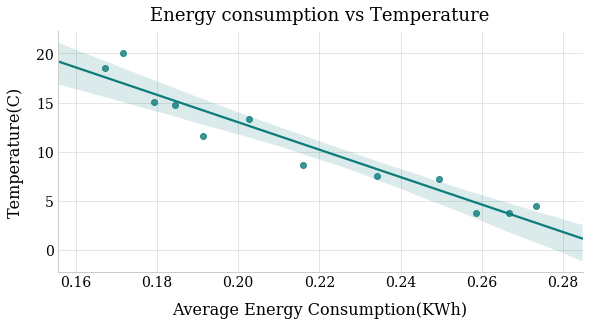

In [41]:
sns.set_style('whitegrid',{'font.family':'serif', 'font.serif':'Old Standard TT'})
sns.lmplot(x='KWh', y='temperature',data=df_temp_energy_lm,size=4, aspect=2)
plt.xticks(fontsize=14, rotation=360,color='black')
plt.yticks(fontsize=14,color='black')
plt.xlabel("Average Energy Consumption(KWh)", fontsize=16,labelpad=12,color='black')
plt.ylabel("Temperature(C)", fontsize=16,labelpad=12,color='black')
plt.title("Energy consumption vs Temperature",fontsize=18,y=1.02,color='black')
plt.grid(linewidth=0.5)
plt.show();